<a href="https://colab.research.google.com/github/msa1997/EEG-with-ML/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import torch.optim as optim

In this assignment, you will explore  Recurrent Neural Networks in more depth. An RNN is a part of the neural network's family used for processing sequential data such as text or audio. There are different types of RNNs concerning the number of inputs and outputs used in different problems. The figure below shows all of them. Based on the nature of the problem, one of these architecture comes in handy, for example:
* one to many: image captioning, where the input is an image and the output is a sequence of generated description words. 
* many to one: sentiment analysis, given a sentence, the model should predict the sentiment, which means one output for a sequence of words.  
* many to many:  machine translation, where the input sequence is in some language, and the output sequence is in some other language (or POS tagging task).

In the first problem, you will write the loss function equation for a many-to-many RNN through baby steps. The second problem is implementation, where you are supposed to implement an LSTM cell yourself. For the next two problems, you will train models for two real-world problems using your own LSTM cell.


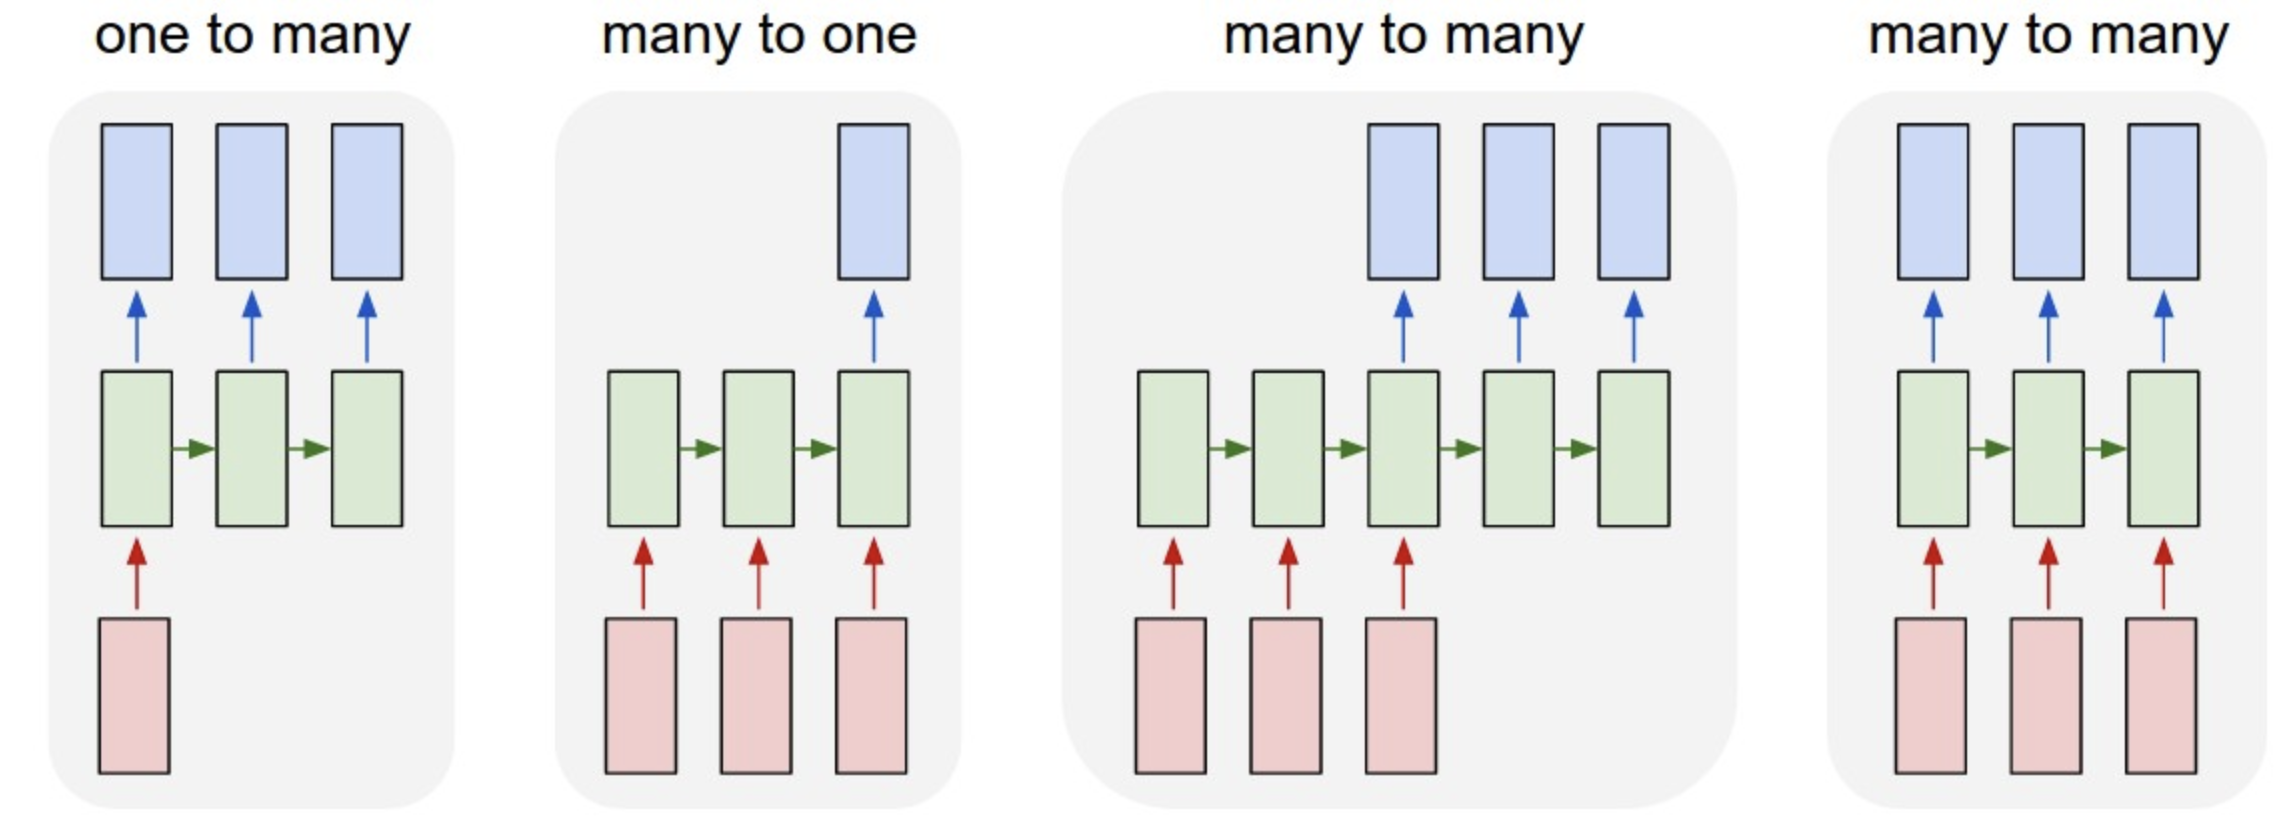

#Problem 1

Imagine, as shown in the image below, we want to build an RNN for a POS (part of speech) tagging task with 17 different labels, in which the model should predict the accurate tag for each word of input sequence based on the context of use. 

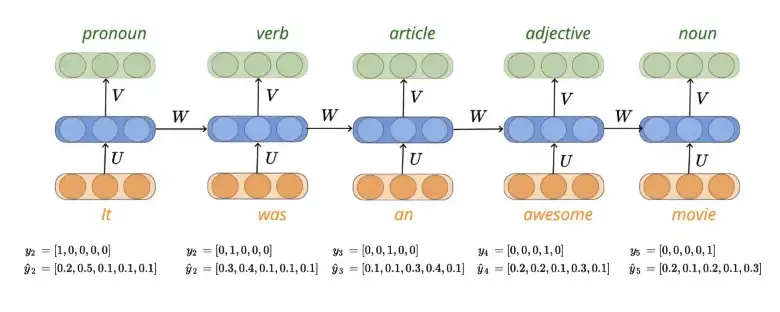

The architecture of our chosen RNN model is shown in the next image (the right one is unrolled form of the left RNN). The traditional approach to training deep networks is to do feed-forward and backpropagation continuously. But before all of it, we have to know how to calculate the loss function based on input data.

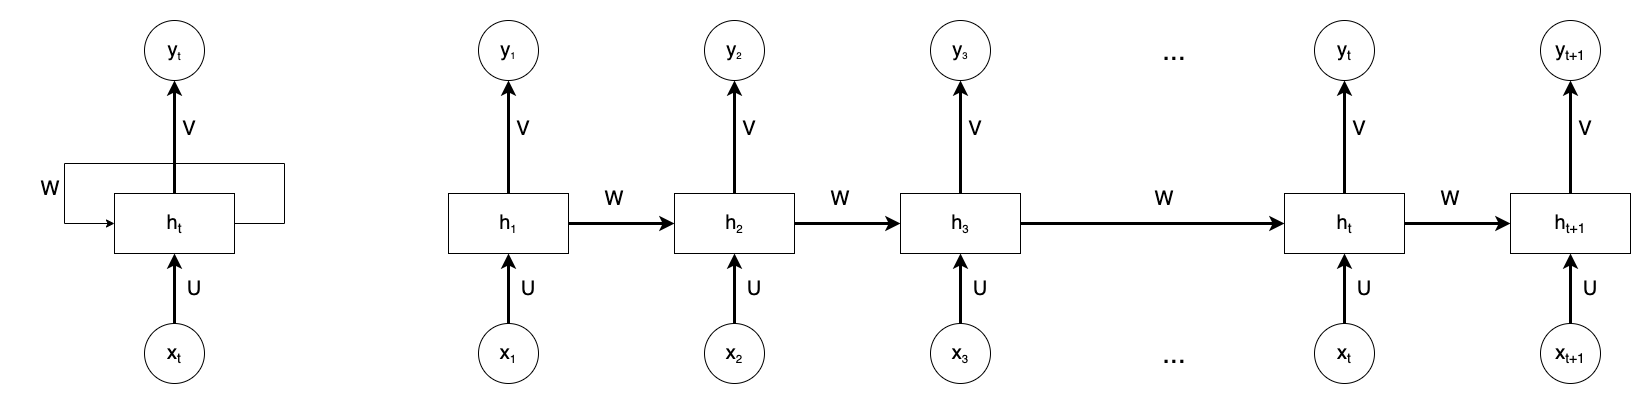


Since we have a prediction output per each timestep, the loss for a single input (a sequence of words) is the sum of each individual timestep's loss. So for a batch of size m, we have: 
$$\begin{aligned} 
Loss &= \frac{1}{m}\sum_{i}^{m}L(y^{(i)}, \hat{y}^{(i)}) \\
&= \frac{1}{m}\sum_{i}^{m}\sum^{T}_{t} L_t(y_t^{(i)},\hat{y}^{(i)}_{t})
\end{aligned}$$


Question: Use cross-entropy and write the equation of $L_t$ as a function of $y_t$ and $\hat{y}_t$. What is the dimension of $y_t$ and $\hat{y}_t$?

<font color='red'>Answer Here</font>

$L_t$($\hat{y}_t$,$y_t$)

=−$y_t$log($\hat{y}_t$)

we have 17 different label thuse we use 17 dimension vector for output



---



Question: As always, we use the softmax function to make $\hat{y}_t$ a probability distribution over all the classes. With this in mind and based on the notation used in the above image, write the equation of $\hat{y}_t$ as a function of $h_t$ and $V$. The size of the hidden unit is a hyperparameter that should be set when an RRN is instantiated. If $h \in \mathbb{R}^p$, then what would be the dimensions of $V$?



<font color='red'>Answer Here</font>

$\hat{y}_t$ = softmax($h_t$V)

dimension of V = (p*17)






---



Question: Following the mentioned arcitucture, determine the equation of $h_t$ where activation funcion is $tanh$. Given $X_t \in \mathbb{R}^d$, specify the dimentions of $W$ and $U$.  

<font color='red'>Answer Here</font>

$h_t$ = tanh($X_t$⋅U+$h_{t-1}$⋅$W_h$+$b_h$)

dimention of W=(p*p)


dimenion of U=(d*p)






---



"RNNs suffer from the problem of vanishing gradients, which hampers learning of long data sequences; in other words, RNNs cannot memorize data for a long time and begin to forget their previous inputs. The gradients carry information used in the RNN parameter update, and when the gradient becomes smaller and smaller, the parameter updates become insignificant, which means no real learning is done."


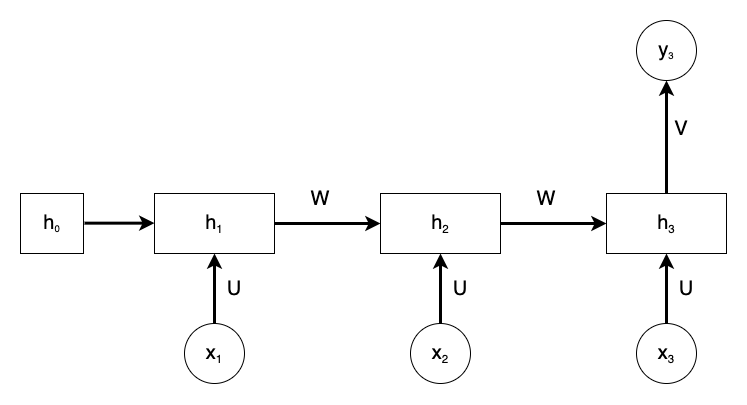


To see this phenomenon, let's calculate the gradients. Assume the length of the input sequence is $3$, as is shown in the image above, calculate the derivation of $L_3$ wrt $U$. (To do so, it is enough to calculate $\frac {\partial h_3}{\partial U}$)


$$\begin{aligned} 
\frac{\partial L_3}{\partial U} = \frac{\partial L_3}{\partial \hat{y}_3} \times \frac{\partial \hat{y}_3} {\partial h_3} \times \frac {\partial h_3}{\partial U}
\end{aligned}$$

Based on it, explain gradient vanishing for $X_1$.

Hint: write $\frac {\partial h_3}{\partial U}$ in form of $G_3X_3 + G_2X_2 + G_1X_1$



<font color='red'>Answer Here</font>


$$\begin{aligned} 
\frac{\partial L_3}{\partial U} = \frac{\partial L_3}{\partial \hat{y}_3} \times \frac{\partial \hat{y}_3} {\partial h_3} \times \frac {\partial h_3}{\partial U}
\end{aligned}$$

$$\begin{aligned} 
\frac{\partial h_3}{\partial U} = \frac{\partial tanh(X_3⋅U+h_{2}⋅W_h+b_h)}{\partial U} 
\end{aligned}$$

$$\begin{aligned} 
\frac{\partial h_3}{\partial U} = G_3X_3+\frac{\partial tanh(X_2⋅U+h_{2}⋅W_h+b_h)}{\partial U} 
\end{aligned}$$

$$\begin{aligned} 
\frac{\partial h_3}{\partial U} = G_3X_3+G_2X_2+\frac{\partial tanh(X_1⋅U+h_{1}⋅W_h+b_h)}{\partial U} 
\end{aligned}$$

$$\begin{aligned} 
\frac{\partial h_3}{\partial U} = G_3X_3+G_2X_2+G1_X1
\end{aligned}$$


In this example we use tanh 3 times in a row for x1 and this reduces the gradient for x1 and makes it disappear after a few steps.

#Problem 2

Since simple RNNs suffer from forgetting early inputs in long sequences, another network called Long-Short-Term-Memory was introduced to solve it. Explain how LSTM mitigated this problem. (No need for mathematics proof)


<font color='red'>Answer Here</font>


LSTMs solve the problem using a unique additive gradient structure that includes direct access to the forget gate's activations, enabling the network to encourage desired behaviour from the error gradient using frequent gates update on every time step of the learning process.



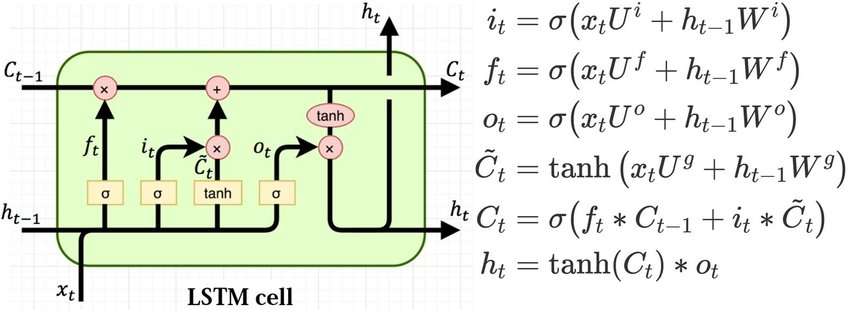

Architecture of an LSTM cell is shown in the image above, using that complete the code below to have a LSTM cell. As long as your LSTM cell works correctly, you do not have to stick to the provided prototype. Implement it however you are comfortable with.  

In [ ]:
import torch
from torch import nn

class LSTM_cell(torch.nn.Module):

    def __init__(self, input_length=10, hidden_length=20):
        super(LSTM_cell, self).__init__()
        self.input_length = input_length
        self.hidden_length = hidden_length

        #initialization 

        # input gate components
        self.linear_input_gate_Wi = nn.Linear(self.input_length, self.hidden_length, bias=True)
        self.linear_input_gate_Ui = nn.Linear(self.hidden_length, self.hidden_length, bias=False)
        self.sigmoid_input_gate = nn.Sigmoid()

        # forget gate components
        self.linear_forget_gate_Wf = nn.Linear(self.input_length, self.hidden_length, bias=True)
        self.linear_forget_gate_Uf = nn.Linear(self.hidden_length, self.hidden_length, bias=False)
        self.sigmoid_forget_gate = nn.Sigmoid()

 
        # cell memory components
        self.linear_gate_Wg = nn.Linear(self.input_length, self.hidden_length, bias=True)
        self.linear_gate_Ug = nn.Linear(self.hidden_length, self.hidden_length, bias=False)
        self.activation_gate = nn.Tanh()

        # out gate components
        self.linear_output_gate_Wo =nn.Linear(self.input_length, self.hidden_length, bias=True)
        self.linear_outptu_gate_U0 = nn.Linear(self.hidden_length, self.hidden_length, bias=False)
        self.sigmoid_out_gate =nn.Sigmoid()

        self.activation_final = nn.Tanh()




    def forget(self, x, h_prev):
        
      #TODO
      x = self.linear_forget_gate_Wf(x)
      h_prev = self.linear_forget_gate_Uf(h_prev)
      f = self.sigmoid_forget_gate(x + h_prev)
      return f






    def input_gate(self, x, h_prev):
      #TODO
      x_temp = self.linear_input_gate_Wi(x)
      h_temp = self.linear_input_gate_Ui(h_prev)
      i = self.sigmoid_input_gate(x_temp + h_temp)
      return i





    def out_gate(self, x, h_prev):

      #TODO
      x = self.linear_output_gate_Wo(x)
      h_prev = self.linear_outptu_gate_U0(h_prev)
      o = self.sigmoid_out_gate(x + h_prev)
      return o




    def cell_memory_gate(self,i, f, x, h_prev,  C_prev):

      #TODO
      x = self.linear_gate_Wg(x)
      h_prev = self.linear_gate_Ug(h_prev)

      k = self.activation_gate(x + h_prev)
      g = k * i

      c = f * C_prev
      c_next = g + c
      return c_next





    def forward(self, x, tuple_in ):
        (h_prev, C_prev) = tuple_in
        
        #TODO
        i = self.input_gate(x, h_prev)

        f = self.forget(x, h_prev)

        c_next = self.cell_memory_gate(i, f, x, h_prev,C_prev)

        o = self.out_gate(x, h_prev)


        h_next = o * self.activation_final(c_next)
        return h_next, c_next

Now run the next three cells to check the sanity of your implantation. In this expremint using your LSTM cell we implement a two layer LSTM model. Given the observed values ​​of a Sine wave so far, the model should predict the next value of the wave.

In [ ]:
#building RNN model
class Sequence(nn.Module):
    def __init__(self):
        super(Sequence, self).__init__()
        self.rnn1 = LSTM_cell(1, 51)
        self.rnn2 = LSTM_cell(51, 51)
        self.linear = nn.Linear(51, 1)

    def forward(self, input):
        outputs = []
        h_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        h_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)

        for i, input_t in enumerate(input.chunk(input.size(1), dim=1)):
            print(input_t.shape)
            h_t, c_t = self.rnn1(input_t, (h_t, c_t))
            h_t2, c_t2 = self.rnn2(h_t, (h_t2, c_t2))

            output = self.linear(h_t2)
            outputs += [output]
    
        outputs = torch.stack(outputs, 1).squeeze(2)
        return outputs


In [ ]:
#generating Data
import numpy as np

np.random.seed(2)

T = 20
L = 1000
N = 200

#generate 200 sin wave with length 1000
x = np.empty((N, L), 'int64')
x[:] = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
data = np.sin(x / 1.0 / T).astype('float64')



#keep the first three waves for test
input = torch.from_numpy(data[3:, :-1])
print(input.shape)
target = torch.from_numpy(data[3:, 1:])
print(target.shape)
test_input = torch.from_numpy(data[:3, :-1])
print(test_input.shape)
test_target = torch.from_numpy(data[:3, 1:])
print(test_target.shape)

torch.Size([197, 999])
torch.Size([197, 999])
torch.Size([3, 999])
torch.Size([3, 999])


In [ ]:
#instantiates model and train it
import torch.optim as optim

seq = Sequence()

seq.double()
criterion = nn.MSELoss()
# use LBFGS as optimizer since we can load the whole data to train
optimizer = optim.LBFGS(seq.parameters(), lr=0.8)
# begin to train
for epoch in range(4):
    print('STEP: ', epoch)

    def closure():
        optimizer.zero_grad()
        out = seq(input)
        loss = criterion(out, target)
        print('loss:', loss.item())
        loss.backward()
        return loss

    optimizer.step(closure)
    # begin to predict, no need to track gradient here
    with torch.no_grad():
        pred = seq(test_input)
        loss = criterion(pred, test_target)
        print('test loss:', loss.item())
        y = pred.detach().numpy()

STEP:  0
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torch.Size([197, 1])
torc

KeyboardInterrupt: ignored

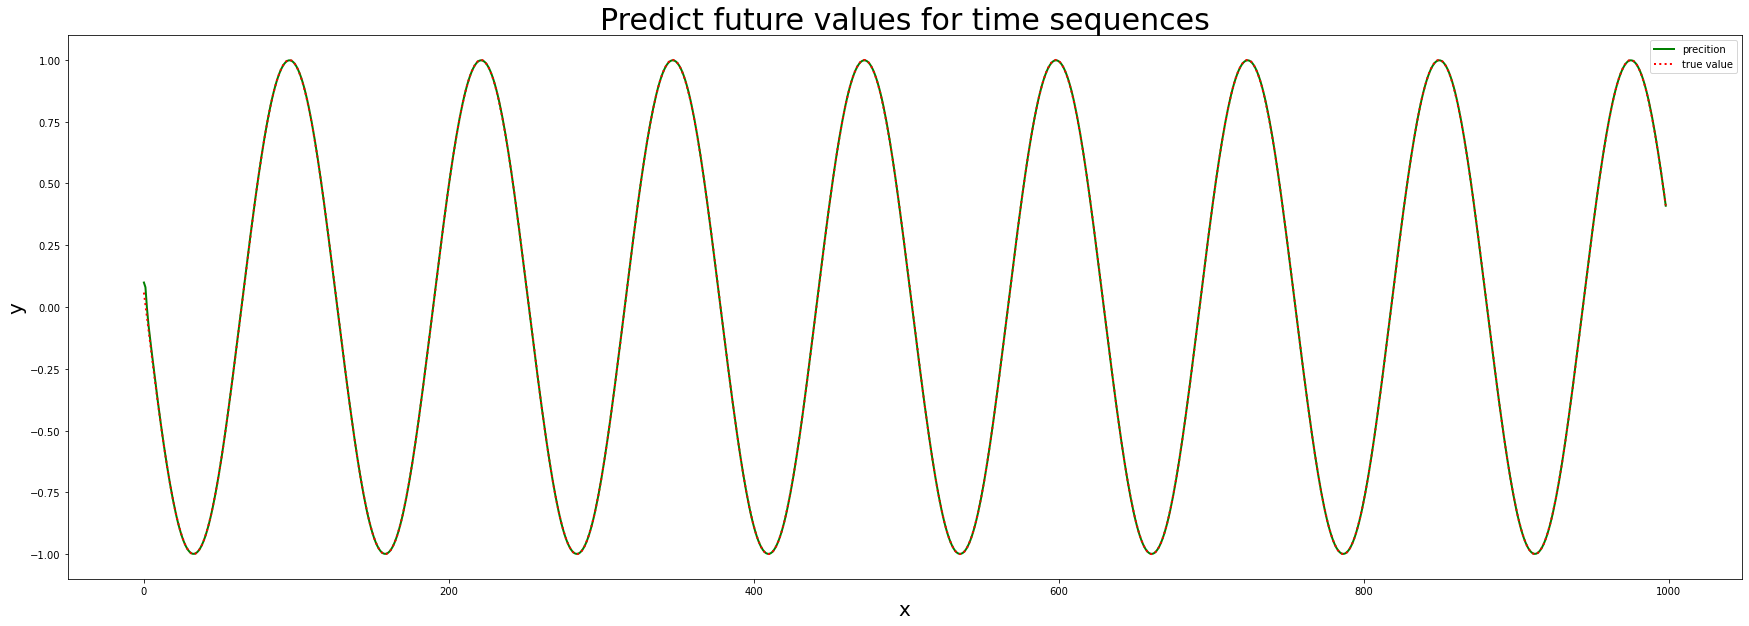

In [ ]:
import matplotlib.pyplot as plt
def draw(predict, y):
        plt.figure(figsize=(30, 10))
        plt.title('Predict future values for time sequences', fontsize=30)
        plt.xlabel('x', fontsize=20)
        plt.ylabel('y', fontsize=20)
        plt.plot(np.arange(input.size(1)), predict[:input.size(1)], 'g', linewidth=2.0, label='precition')
        plt.plot(np.arange(input.size(1)), y[:input.size(1)], 'r:', linewidth=2.0, label='true value')
        plt.legend()

#test 1
draw(y[0], test_target[0])

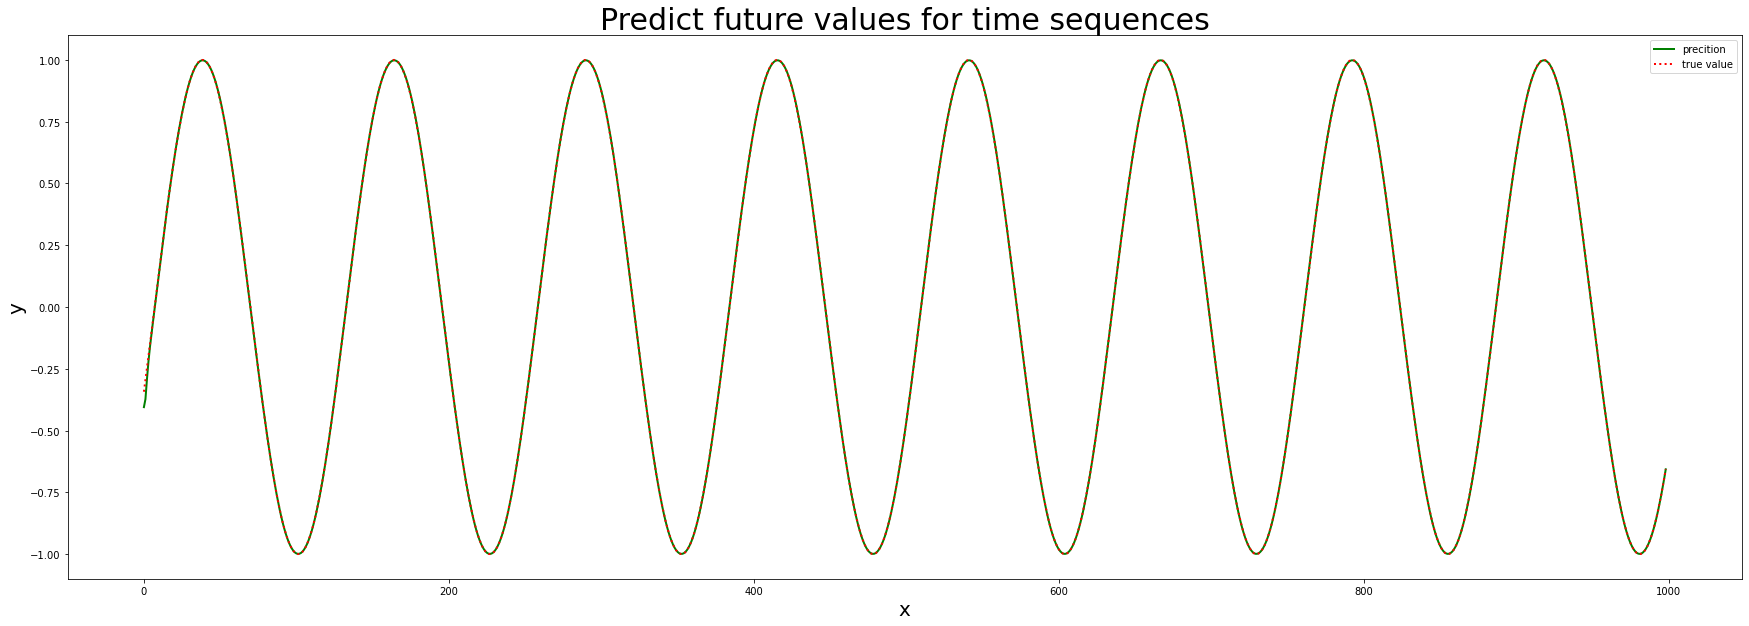

In [ ]:
#test 1
draw(y[1], test_target[1])

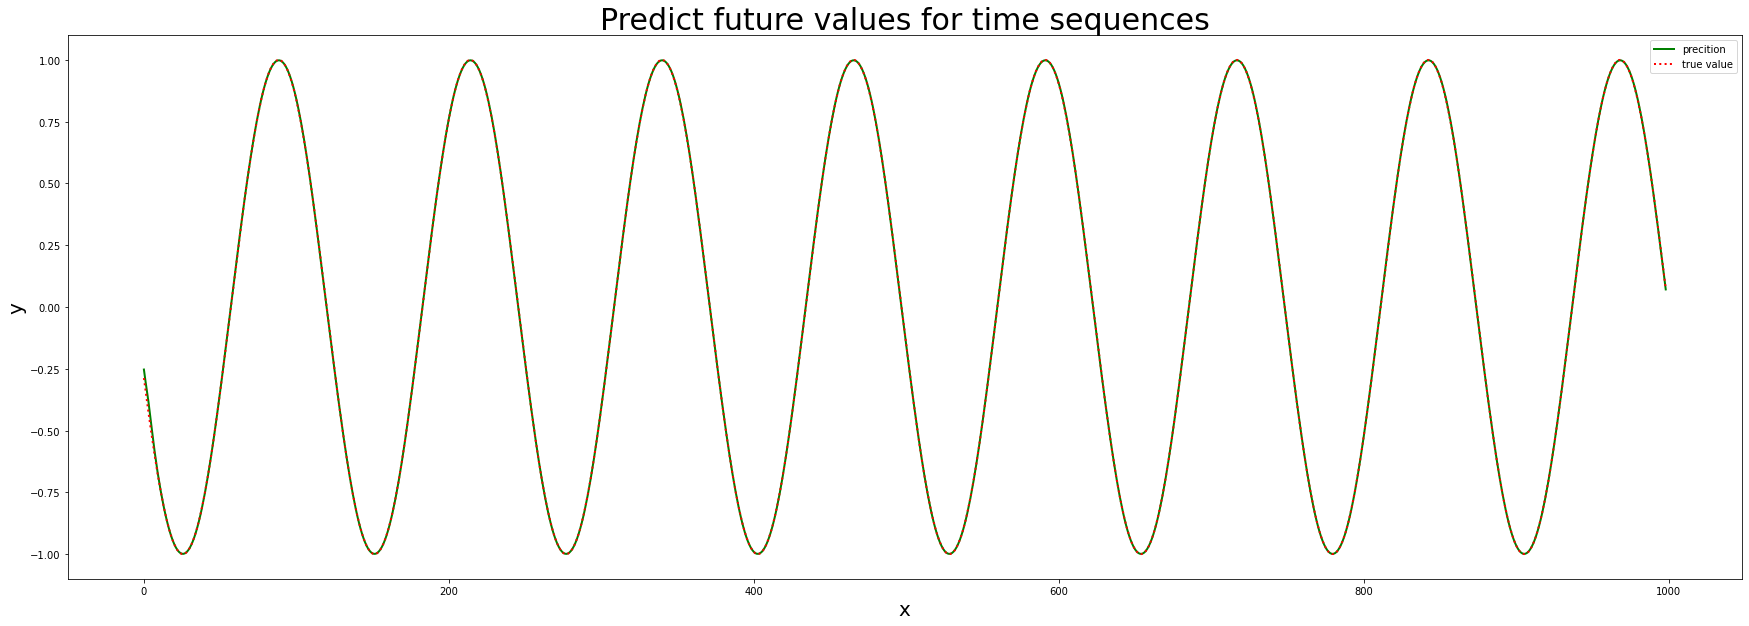

In [ ]:
#test 1
draw(y[2], test_target[2])

#Problem 3


In this problem, you will build and train a model using your own LSTM cell to predict the stock market.

Use the test and training datasets provided and build a model with the appropriate architecture of your choice. The only limitation is that you must use your own implemented LSTM cell. Each data input is information from 59 consecutive days, and your model should be able to predict the next day's prices as accurately as possible.

In [ ]:
import pandas as pd

In [ ]:
# Read data 
df = pd.read_csv('NVDA.csv')
df

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,US1.NVDA,D,20101004,0,11.24,11.430,11.01,11.23,18184874
1,US1.NVDA,D,20101005,0,11.48,11.500,11.29,11.32,18266877
2,US1.NVDA,D,20101006,0,11.32,11.370,10.67,10.78,25753399
3,US1.NVDA,D,20101007,0,10.82,10.840,10.38,10.70,18732301
4,US1.NVDA,D,20101008,0,10.65,10.950,10.51,10.86,16998198
...,...,...,...,...,...,...,...,...,...
2762,US1.NVDA,D,20210927,0,217.16,217.750,213.28,216.57,625939
2763,US1.NVDA,D,20210928,0,212.01,214.030,206.51,207.02,835341
2764,US1.NVDA,D,20210929,0,209.33,210.160,204.68,205.22,606902
2765,US1.NVDA,D,20210930,0,207.89,210.650,206.89,207.12,537697


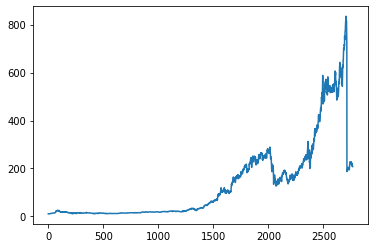

In [ ]:
plt.plot( df['<OPEN>'])

In [ ]:
# create train and test data
def load_data(stock, window_size):
    data_raw = stock.values # convert to numpy array
    data = []
    
    # create all possible sequences of length window_size
    for index in range(len(data_raw) - window_size): 
        data.append(data_raw[index: index + window_size,:-4])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1,:]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

window_size = 60 # choose sequence length
x_train, y_train, x_test, y_test = load_data(df, window_size)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2166, 59, 5)
y_train.shape =  (2166, 5)
x_test.shape =  (541, 59, 5)
y_test.shape =  (541, 5)


In [ ]:
xx_train=torch.from_numpy(x_train[:,:,4].astype('float64'))
yy_train = x_train[:,:,4]
for i in range(y_train.shape[0]):
  for j in range(y_train.shape[1]):
    if j==58 :
      yy_train[i][j] =  y_train[i][4]
    else:
      yy_train[i][j] = x_train[i][j+1][4]
yy_train=torch.from_numpy(yy_train.astype('float64'))
xx_test=torch.from_numpy(x_test[:,:,4].astype('float64'))
yy_test=torch.from_numpy(y_test[:,4].astype('float'))

In [ ]:
#building RNN model
class Sequence(nn.Module):
    def __init__(self):
        super(Sequence, self).__init__()
        self.rnn1 = LSTM_cell(1, 51)
        self.rnn2 = LSTM_cell(51, 51)
        self.linear = nn.Linear(51, 1)

    def forward(self, input, c=1):
        outputs = []
        h_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t = torch.zeros(input.size(0), 51, dtype=torch.double)
        h_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)
        c_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)

        if c==1:

          for i, input_t in enumerate(input.chunk(input.size(1), dim=1)):
              o = self.rnn1.out_gate(input_t,h_t)
              h_t, c_t = self.rnn1(input_t, (h_t, c_t))
              o2 = self.rnn2.out_gate(o,h_t2)
              h_t2, c_t2 = self.rnn2(o, (h_t2, c_t2))

              output = self.linear(o2)
              outputs += [output]
        else:

            for i, input_t in enumerate(input.chunk(input.size(1), dim=1)):
              o = self.rnn1.out_gate(input_t,h_t)
              #h_t, c_t = self.rnn1(input_t, (h_t, c_t))
              o2 = self.rnn2.out_gate(o,h_t2)
              #h_t2, c_t2 = self.rnn2(o, (h_t2, c_t2))

              output = self.linear(o2)
              outputs += [output]
    
        outputs = torch.stack(outputs, 1).squeeze(2)
        return outputs


In [ ]:
#instantiates model and train it
import torch.optim as optim

test_loss = []
train_loss = []

seq = Sequence()

seq.double()
criterion = nn.MSELoss()
# use LBFGS as optimizer since we can load the whole data to train
optimizer = optim.Adam(seq.parameters(), lr=0.02)
#optimizer = optim.LBFGS(seq.parameters(), lr=0.088)
# begin to train
for epoch in range(1000):
    print('STEP: ', epoch)

    def closure():
        optimizer.zero_grad()
        out = seq(xx_train,0)
        loss = criterion(out,yy_train)
        print('loss:', loss.item())
        train_loss.append(loss.item())
        loss.backward()
        return loss
    
    optimizer.step(closure)
    # begin to predict, no need to track gradient here
    with torch.no_grad():
        pred = seq(xx_test,0)[:,58]
        loss = criterion(pred,yy_test)
        print('test loss:', loss.item())
        test_loss.append(loss.item())
        y = pred.detach().numpy()

STEP:  0
loss: 11242.89089323495
test loss: 185024.34894478298
STEP:  1
loss: 11108.171253112436
test loss: 184298.44515548347
STEP:  2
loss: 10981.188317944596
test loss: 183611.59925644443
STEP:  3
loss: 10862.253996879803
test loss: 182961.107616525
STEP:  4
loss: 10750.611871705494
test loss: 182330.2366100905
STEP:  5
loss: 10643.989006623055
test loss: 181719.14776370206
STEP:  6
loss: 10542.246959802205
test loss: 181129.5581145012
STEP:  7
loss: 10444.16076281553
test loss: 180538.451620096
STEP:  8
loss: 10347.43517780216
test loss: 179952.35939265593
STEP:  9
loss: 10252.423984168534
test loss: 179374.16229280378
STEP:  10
loss: 10159.246738893347
test loss: 178794.4076034674
STEP:  11
loss: 10066.879055680629
test loss: 178210.10461809128
STEP:  12
loss: 9974.712134842146
test loss: 177615.80078145486
STEP:  13
loss: 9882.350330531053
test loss: 177015.31305336155
STEP:  14
loss: 9789.653519929247
test loss: 176397.3282003068
STEP:  15
loss: 9695.404551717918
test loss: 1757

In [ ]:
optimizer = optim.LBFGS(seq.parameters(), lr=0.044)
# begin to train
for epoch in range(40):
    print('STEP: ', epoch)

    def closure():
        optimizer.zero_grad()
        out = seq(xx_train)
        loss = criterion(out,yy_train)
        print('loss:', loss.item())
        train_loss.append(loss.item())
        loss.backward()
        return loss
    
    optimizer.step(closure)
    # begin to predict, no need to track gradient here
    with torch.no_grad():
        pred = seq(xx_test)[:,58]
        loss = criterion(pred,yy_test)
        print('test loss:', loss.item())
        test_loss.append(loss.item())
        y = pred.detach().numpy()

STEP:  0
loss: 16.62741560003076
loss: 208.33592050629832
loss: 194.10466822082762
loss: 173.35752858802704
loss: 155.64902694420647
loss: 140.51708707502868
loss: 127.31249796659611
loss: 115.58831891844287
loss: 105.04086366536762
loss: 95.4617032679811
loss: 86.70803302472997
loss: 78.6838883315887
loss: 71.32713706464023
loss: 64.59908851075278
loss: 58.47504438699636
loss: 52.9355426464901
loss: 47.95918777104985
loss: 43.518252148959945
loss: 39.577505816078975
loss: 36.09562258162146
test loss: 48592.409348462155
STEP:  1
loss: 33.02787421641994
loss: 30.32893017360784
loss: 27.955086493931827
loss: 25.86572868475396
loss: 24.024109047162707
loss: 22.397614179074893
loss: 20.957696745731887
loss: 19.679609564881968
loss: 18.54204000139704
loss: 17.526709186612795
loss: 16.617975620346115
loss: 15.802465310215087
loss: 15.068739100416629
loss: 14.40700064508194
loss: 13.808844268158108
loss: 13.267039711539148
loss: 12.775349776298782
loss: 12.328376607094121
loss: 11.92143252767

In [ ]:
optimizer = optim.Adam(seq.parameters(), lr=0.01)
#optimizer = optim.LBFGS(seq.parameters(), lr=0.088)
# begin to train
for epoch in range(500):
    print('STEP: ', epoch)

    def closure():
        optimizer.zero_grad()
        out = seq(xx_train)
        loss = criterion(out,yy_train)
        print('loss:', loss.item())
        train_loss.append(loss.item())
        loss.backward()
        return loss
    
    optimizer.step(closure)
    # begin to predict, no need to track gradient here
    with torch.no_grad():
        pred = seq(xx_test)[:,58]
        loss = criterion(pred,yy_test)
        print('test loss:', loss.item())
        test_loss.append(loss.item())
        y = pred.detach().numpy()

STEP:  0
loss: 0.8997207618999764
test loss: 39718.21286624327
STEP:  1
loss: 1010.5478935054301
test loss: 38027.20059443753
STEP:  2
loss: 119.7508282748104
test loss: 39763.38320629242
STEP:  3
loss: 710.5330832287367
test loss: 38460.62403651236
STEP:  4
loss: 107.21822464374912
test loss: 38249.47869849915
STEP:  5
loss: 94.27086616996539
test loss: 38524.46062991364
STEP:  6
loss: 284.5717188856606
test loss: 38556.25212816325
STEP:  7
loss: 237.5220793969743
test loss: 38835.74009070892
STEP:  8
loss: 112.92052764159502
test loss: 40047.173690883676
STEP:  9
loss: 84.22576619337288
test loss: 41762.851532667955
STEP:  10
loss: 137.19054607840906
test loss: 42815.82596499495
STEP:  11
loss: 181.02737229971243
test loss: 42975.419835823544
STEP:  12
loss: 151.99439269768413
test loss: 42709.61944466198
STEP:  13
loss: 75.98353653203993
test loss: 42510.70860014797
STEP:  14
loss: 45.306700881092425
test loss: 42474.38828008613
STEP:  15
loss: 69.14721378504541
test loss: 42488.980

In [ ]:
optimizer = optim.LBFGS(seq.parameters(), lr=0.044)
# begin to train
for epoch in range(40):
    print('STEP: ', epoch)

    def closure():
        optimizer.zero_grad()
        out = seq(xx_train)
        loss = criterion(out,yy_train)
        print('loss:', loss.item())
        train_loss.append(loss.item())
        loss.backward()
        return loss
    
    optimizer.step(closure)
    # begin to predict, no need to track gradient here
    with torch.no_grad():
        pred = seq(xx_test)[:,58]
        loss = criterion(pred,yy_test)
        print('test loss:', loss.item())
        test_loss.append(loss.item())
        y = pred.detach().numpy()

STEP:  0
loss: 0.8740511574962672
loss: 77.93432524613188
loss: 72.9559725842159
loss: 67.76516570437434
loss: 62.390375685344964
loss: 56.88643988127243
loss: 51.33589201226458
loss: 5.990032791868312
loss: 5.79696316802808
loss: 5.2091720685709735
loss: 4.658742781423757
loss: 4.1602955885080615
loss: 3.7150606669786397
loss: 3.322689183125039
loss: 2.9813047260411065
loss: 2.6874939296761866
loss: 2.4366624541502864
loss: 2.223595982561436
loss: 2.04300782932795
loss: 1.8899366678358478
test loss: 38395.73425203102
STEP:  1
loss: 1.7599647923144914
loss: 1.6492927134142672
loss: 1.554723598824637
loss: 1.473602447190483
loss: 1.4037393237748936
loss: 1.3433327723975637
loss: 1.2909008174242034
loss: 1.2452220390960658
loss: 1.2052867364493065
loss: 1.1702571304778393
loss: 1.139435229555086
loss: 1.1122369929640483
loss: 1.0881715825015068
loss: 1.0668246859019135
loss: 1.047845083817611
loss: 1.030933796690755
loss: 1.0158352847308065
loss: 1.002330284829865
loss: 0.990229956198969

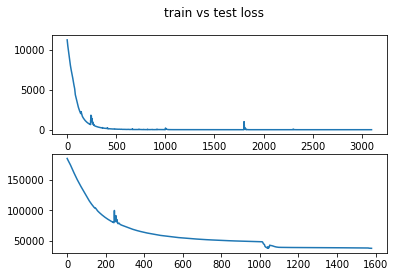

In [ ]:
# Plot loss based on epochs for both test and train
#####################

fig, axs = plt.subplots(2)
fig.suptitle('train vs test loss')
axs[0].plot(range(len(train_loss)), train_loss)
axs[1].plot(range(len(test_loss)), test_loss)


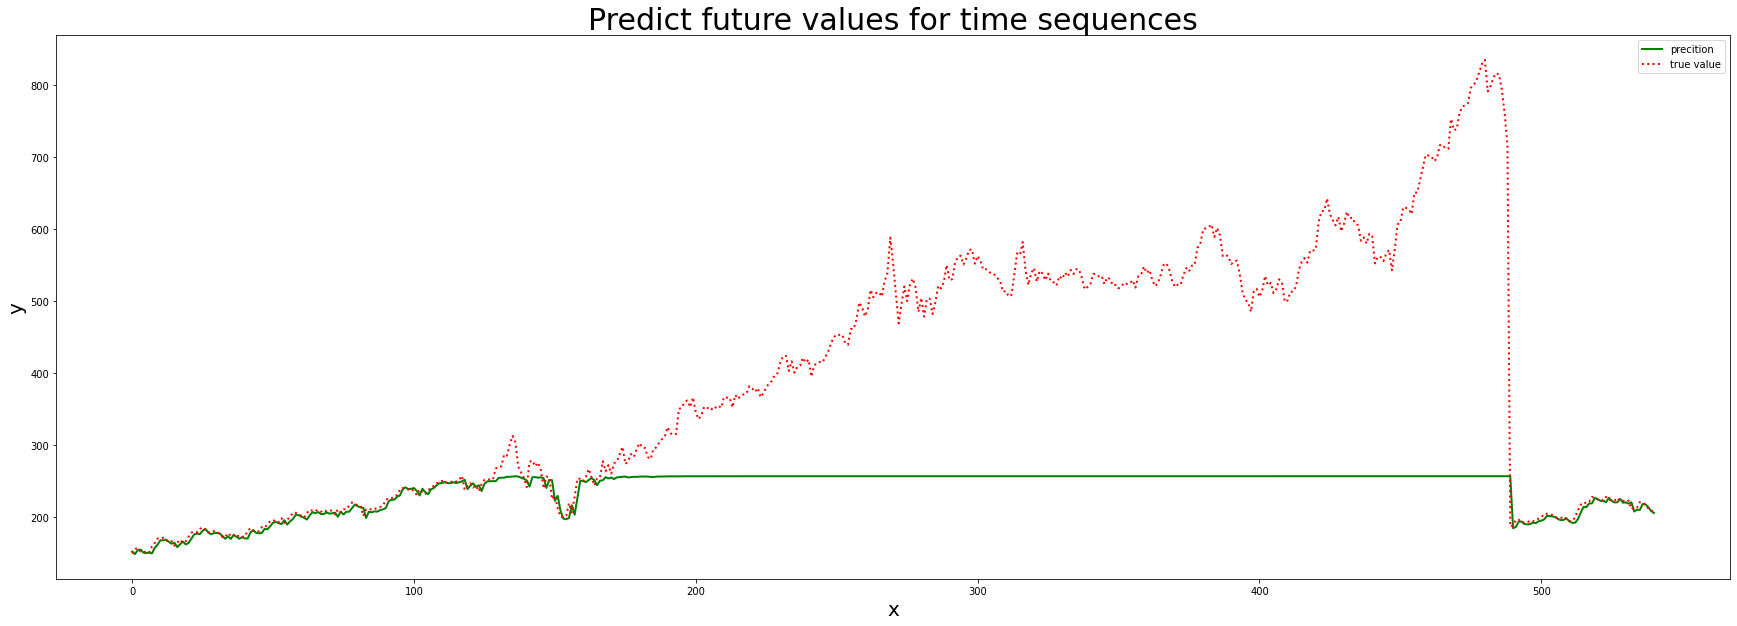

In [ ]:
# Visualising the prediction results 
#####################
plt.figure(figsize=(30, 10))
plt.title('Predict future values for time sequences', fontsize=30)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.plot( y, 'g', linewidth=2.0, label='precition')
plt.plot( y_test[:,4], 'r:', linewidth=2.0, label='true value')
plt.legend()

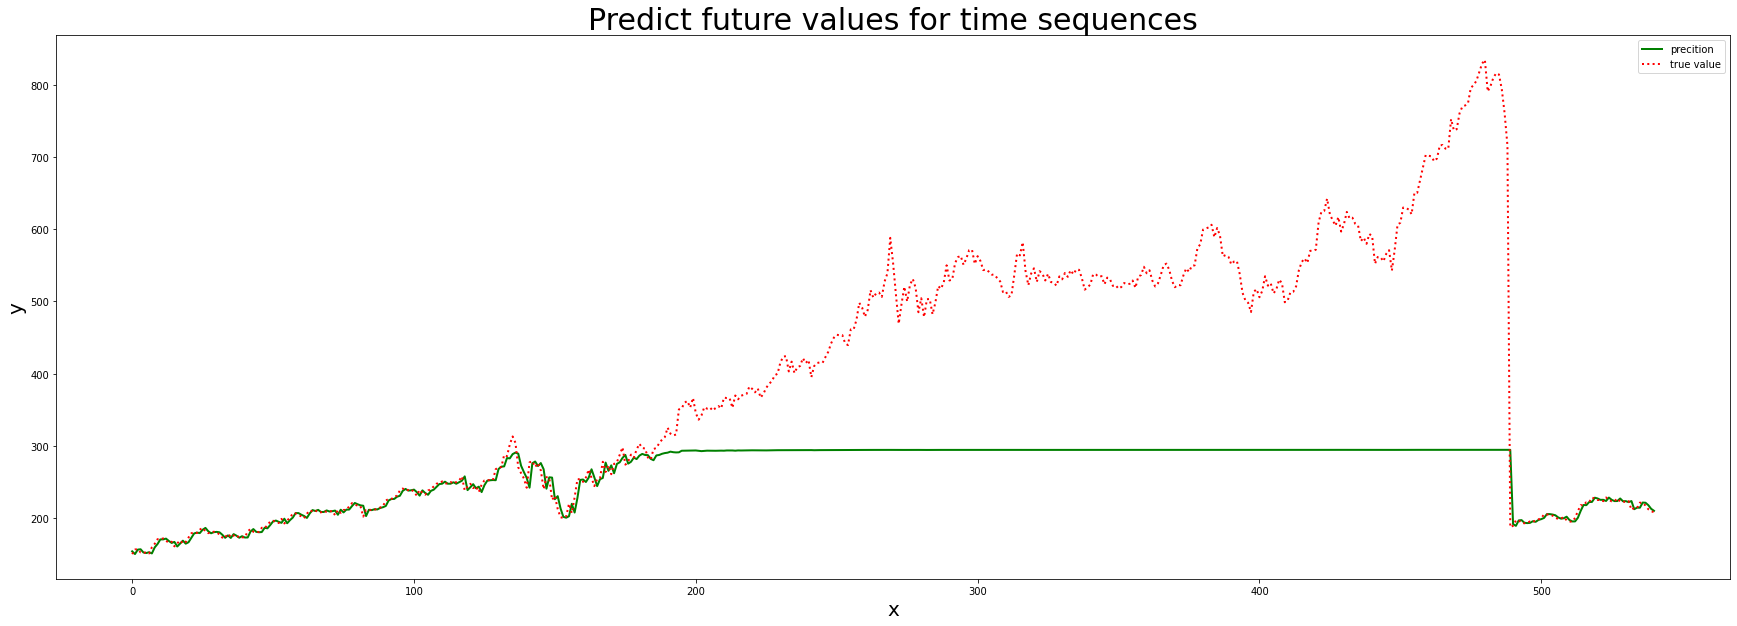

In [ ]:
# Visualising the prediction results 
#####################
plt.figure(figsize=(30, 10))
plt.title('Predict future values for time sequences', fontsize=30)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.plot( y, 'g', linewidth=2.0, label='precition')
plt.plot( y_test[:,4], 'r:', linewidth=2.0, label='true value')
plt.legend()

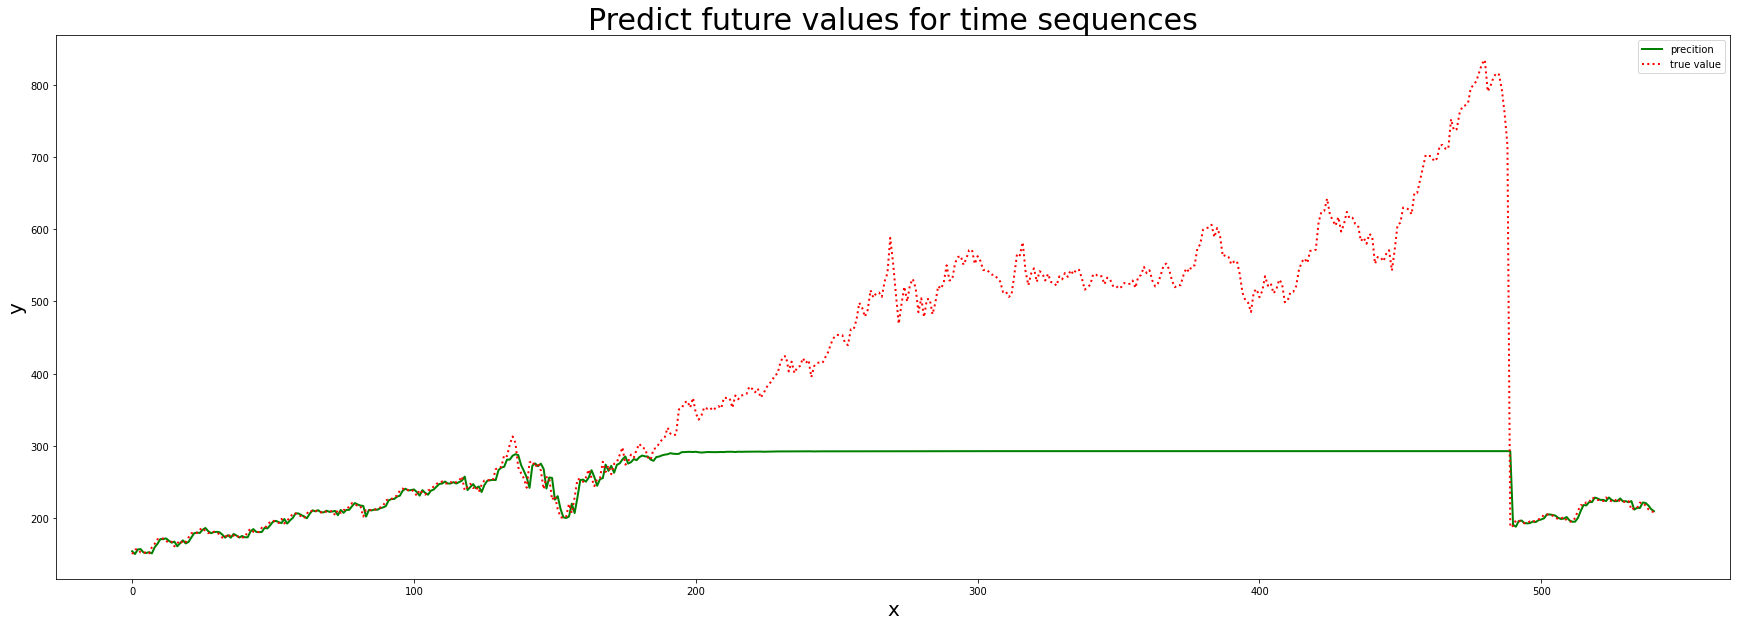

In [ ]:
# Visualising the prediction results 
#####################
plt.figure(figsize=(30, 10))
plt.title('Predict future values for time sequences', fontsize=30)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.plot( y, 'g', linewidth=2.0, label='precition')
plt.plot( y_test[:,4], 'r:', linewidth=2.0, label='true value')
plt.legend()

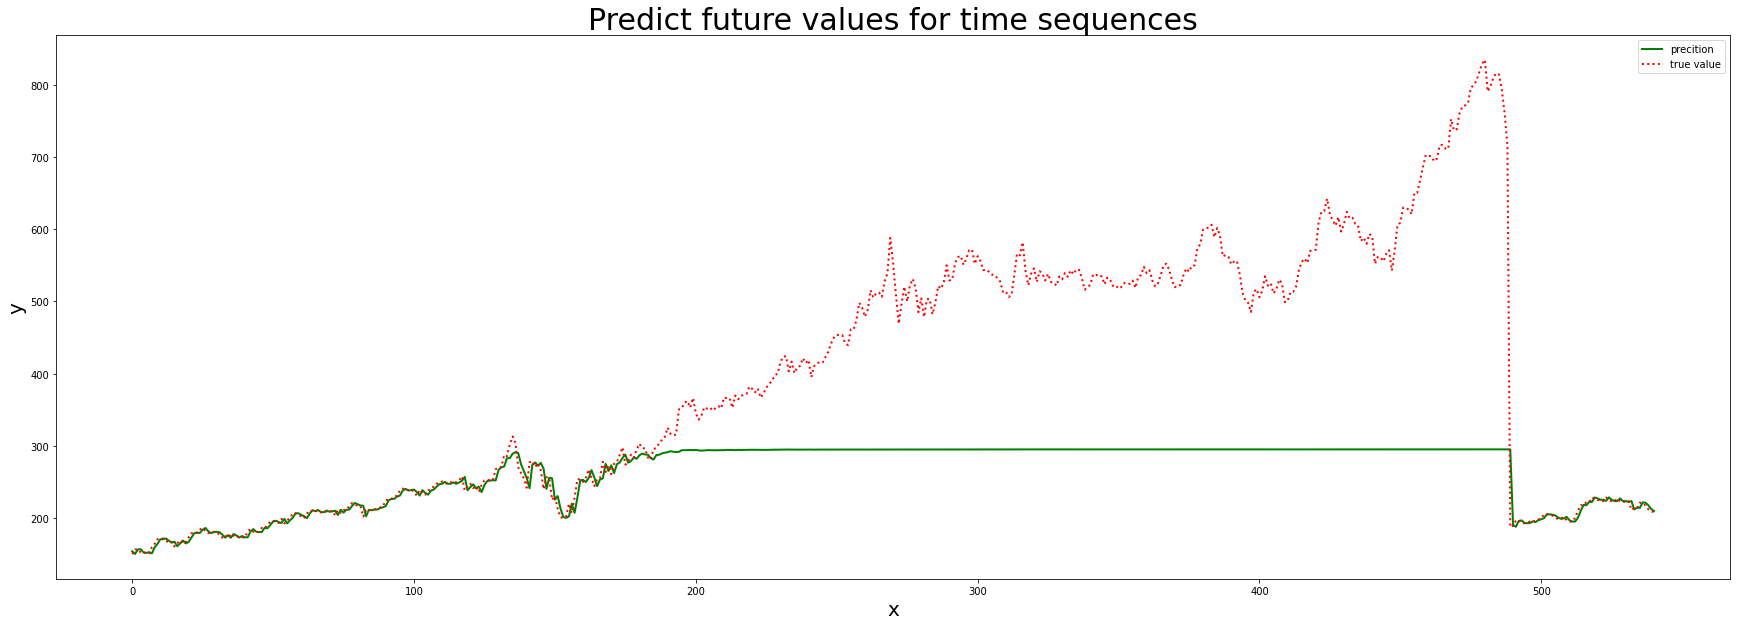

In [ ]:
# Visualising the prediction results 
#####################
plt.figure(figsize=(30, 10))
plt.title('Predict future values for time sequences', fontsize=30)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.plot( y, 'g', linewidth=2.0, label='precition')
plt.plot( y_test[:,4], 'r:', linewidth=2.0, label='true value')
plt.legend()

#Problem 4


In this problem, we will train an LSTM network to generate Persian names. The model will see a sequence of characters corresponding to the names and will be trained with the objective of predicting the best next character for the given sequence. An overview of the model is illustrated in the picture below. 

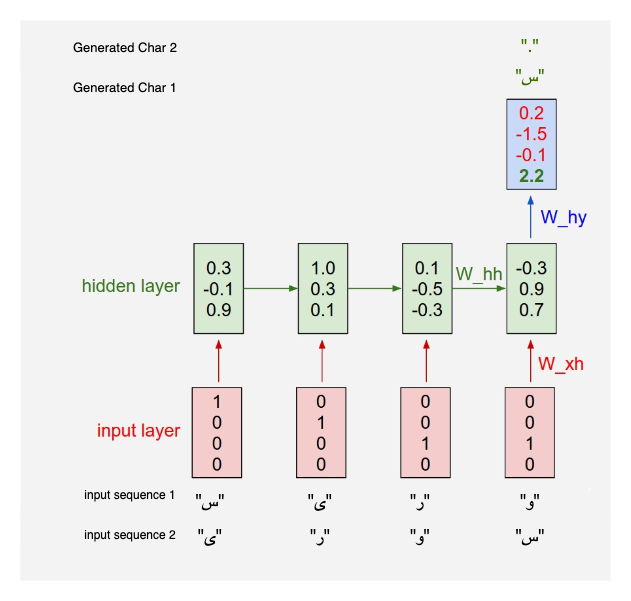

Quesrion: Teacher forcing is a technique used in training  of RNNs, study about it and explained it in your words.

<font color='red'>Answer Here</font>

Teacher forcing is an algorithm for training the weights of recurrent neural networks (RNNs). It involves feeding observed sequence values (i.e. ground-truth samples) back into the RNN after each step, thus forcing the RNN to stay close to the ground-truth sequence.



Dataset `Persian_names` contains  ~4k names. For the first step, load the dataset and extract the names into `input_names`

In [2]:
#import libraries 
import pandas as pd

In [3]:
# Read data 
df = pd.read_csv('/content/Persian_names.csv')
df

,first_name,%GT Count of id
0,فاطمه,6.23%
1,زهرا,4.42%
2,علي,2.56%
3,محمد,2.48%
4,مريم,2.26%
...,...,...
4050,يوسف علي,0.00%
4051,يوسف مهدي,0.00%
4052,يونا,0.00%
4053,يونس رضا,0.00%


In [4]:
#####

input_names = df['first_name']
input_names
#####

0           فاطمه
1            زهرا
2             علي
3            محمد
4            مريم
          ...    
4050     يوسف علي
4051    يوسف مهدي
4052         يونا
4053     يونس رضا
4054     يونس علي
Name: first_name, Length: 4055, dtype: object

By joining all the names, we make a long string of names with `.` character as a discriminator; then, by moving a sliding window with size of the longest name over this string, we sample input training data. The output for each window is the next character to the window. In the cell below, complete the code to calculate the size of the longest name as `window_size`. The rest of the code extract inputs and outputs for training the model. 

In [5]:
# Make it all to a long string
concat_all_names = '.'.join(input_names).lower()

window_size = 0
for names in input_names:
  if len(names)>window_size:
    window_size = len(names)






input_sequences = []  #inputs (x)
next_chars = [] #labels (y)

# moving sliding window over data to extart input sequences for training
for i in range(0, len(concat_all_names) - window_size, 1):
    input_sequences.append(concat_all_names[i: i + window_size])
    next_chars.append(concat_all_names[i + window_size])

num_sequences = len(input_sequences)

print('Number of training inputs:', num_sequences)
print('First 10 sequences and next chars:')
for i in range(10):
    print(f'X=[{input_sequences[i]}]   y=[{ next_chars[i]}]')

Number of training inputs: 32456
First 10 sequences and next chars:
X=[فاطمه.زهرا.علي.محم]   y=[د]
X=[اطمه.زهرا.علي.محمد]   y=[.]
X=[طمه.زهرا.علي.محمد.]   y=[م]
X=[مه.زهرا.علي.محمد.م]   y=[ر]
X=[ه.زهرا.علي.محمد.مر]   y=[ي]
X=[.زهرا.علي.محمد.مري]   y=[م]
X=[زهرا.علي.محمد.مريم]   y=[.]
X=[هرا.علي.محمد.مريم.]   y=[م]
X=[را.علي.محمد.مريم.م]   y=[ه]
X=[ا.علي.محمد.مريم.مه]   y=[د]


Find all the unique characters used in the names and make a dictionary, mapping each unique character to a unique number. We do so to convert characters that are of type `str` to numbers (or vectors) since the neural networks typically work with numbers to do their math!

In [6]:
chars = sorted(list(set(concat_all_names)))
mapping = dict((c, i) for i, c in enumerate(chars))
mapping

{' ': 0,
 '.': 1,
 'ء': 2,
 'آ': 3,
 'أ': 4,
 'ؤ': 5,
 'ئ': 6,
 'ا': 7,
 'ب': 8,
 'ة': 9,
 'ت': 10,
 'ث': 11,
 'ج': 12,
 'ح': 13,
 'خ': 14,
 'د': 15,
 'ذ': 16,
 'ر': 17,
 'ز': 18,
 'س': 19,
 'ش': 20,
 'ص': 21,
 'ض': 22,
 'ط': 23,
 'ظ': 24,
 'ع': 25,
 'غ': 26,
 'ف': 27,
 'ق': 28,
 'ك': 29,
 'ل': 30,
 'م': 31,
 'ن': 32,
 'ه': 33,
 'و': 34,
 'ي': 35,
 'پ': 36,
 'چ': 37,
 'ژ': 38,
 'گ': 39}

In [7]:
#TODO
num_uniq_char = len(mapping)#TODO
char2idx = mapping #TODO

Now using the `char2indx` dictionary, create `X` and `y` as described below:

Map all characters of `input_sequences` and `next-char` to the numbers and then convert numbers to one-hot encoding. thus the shape of `X` and `y` should be `(num_sequences, window_size, num_uniq_char)`  and `(num_sequences, num_uniq_char)` respectively.

In [93]:
x=[[char2idx[i] for i in j]for j in input_sequences[:]]
y=[char2idx[i] for i in next_chars[:]]


In [94]:
#TODO
import tensorflow as tf
X = [[tf.keras.utils.to_categorical(i, num_classes=num_uniq_char) for i in j]for j in x]
Y = [tf.keras.utils.to_categorical(i, num_classes=num_uniq_char) for i in y]
#X = nn.FUNCTIONAL.ONE_HOT(x)
#Y = nn.FUNCTIONAL.ONE_HOT(y)
X = np.array(X)
Y = np.array(Y)
X = torch.from_numpy(X)
Y = torch.from_numpy(Y)

Build a model to predict the next character of the given sequence.

In [53]:


import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchtext.vocab import Vectors, GloVe

In [78]:

learning_rate = 2e-5
batch_size = 32
output_size = 2
hidden_size = 257
embedding_length = 300
epochs = 10

In [79]:
# your model

In [80]:
for i in X.chunk(X.size(2), dim=1):
  print('r')
  print(i.shape)

r
torch.Size([256, 1, 40])
r
torch.Size([256, 1, 40])
r
torch.Size([256, 1, 40])
r
torch.Size([256, 1, 40])
r
torch.Size([256, 1, 40])
r
torch.Size([256, 1, 40])
r
torch.Size([256, 1, 40])
r
torch.Size([256, 1, 40])
r
torch.Size([256, 1, 40])
r
torch.Size([256, 1, 40])
r
torch.Size([256, 1, 40])
r
torch.Size([256, 1, 40])
r
torch.Size([256, 1, 40])
r
torch.Size([256, 1, 40])
r
torch.Size([256, 1, 40])
r
torch.Size([256, 1, 40])
r
torch.Size([256, 1, 40])
r
torch.Size([256, 1, 40])


In [81]:
class LSTMC(nn.Module):
    def __init__(self, character_size, hidden_size):
        super(LSTMC, self).__init__()
        self.character_size = character_size
        self.hidden_size = hidden_size
         

        self.lstm = nn.LSTM(input_size = character_size,hidden_size = hidden_size, batch_first=True) 
        self.label = nn.Linear(hidden_size, character_size)
    
    def forward(self, input, c=1):
        outputs = []
        h_t = torch.zeros(1,input.size(0), self.hidden_size, dtype=torch.float)
        c_t = torch.zeros(1,input.size(0), self.hidden_size, dtype=torch.float)

        if c==1:

            for i, input_t in enumerate(input.chunk(input.size(2), dim=1)):
                o,(h_t, c_t) = self.lstm(input_t,(h_t, c_t))
                output = self.label(o)
                output = torch.sigmoid(output)
                outputs += [output]
        else:

            for i, input_t in enumerate(input.chunk(input.size(2), dim=1)):
                o = self.lstm(input_t,(h_t, c_t))
                #print(o.shape)
                output = self.label(o)
                output = torch.sigmoid(output)
                outputs += [output]
    
        outputs = torch.stack(outputs, 1).squeeze(2)
        return outputs

Now train your model with epoch > 40.



In [97]:
#Training
###
import torch.optim as optim

word_train_loss = []

LSTMClassifier = LSTMC( num_uniq_char, hidden_size)

# LSTMClassifier.double()
criterion = nn.CrossEntropyLoss()
# use LBFGS as optimizer since we can load the whole data to train
optimizer = optim.Adam(LSTMClassifier.parameters(), lr=.030)
#optimizer = optim.LBFGS(LSTMClassifier.parameters(), lr=0.04)
# begin to train
for epoch in range(45):
    print('STEP: ', epoch)

    def closure():
        optimizer.zero_grad()
        out = LSTMClassifier(X)[:,17,:]
        loss = criterion(out,Y)
        print('loss:', loss.item())
        word_train_loss.append(loss.item())
        loss.backward()
        return loss
    
    optimizer.step(closure)

STEP:  0
loss: 3.687997341156006
STEP:  1
loss: 3.317007541656494
STEP:  2
loss: 3.3058276176452637
STEP:  3
loss: 3.3040714263916016
STEP:  4
loss: 3.303555727005005
STEP:  5
loss: 3.304853916168213
STEP:  6
loss: 3.3042116165161133
STEP:  7
loss: 3.3034398555755615
STEP:  8
loss: 3.3034040927886963
STEP:  9
loss: 3.304029941558838
STEP:  10
loss: 3.3027853965759277
STEP:  11
loss: 3.303241491317749
STEP:  12
loss: 3.303464651107788
STEP:  13
loss: 3.3032026290893555
STEP:  14
loss: 3.303419351577759
STEP:  15
loss: 3.303391456604004
STEP:  16
loss: 3.3032302856445312
STEP:  17
loss: 3.303187370300293


KeyboardInterrupt: ignored

Finally, generate 15 distinct names using your trained model. Your generated names should be unique and new, not exist in the `Persian dataset`, and should have more than two characters. Ignore names that do not satisfy these conditions and generate a new one. 

At first, to generate next_char, you have to have an input sequence of length window_size; use `initial_sequence` for that. For the rest of the input sequences, each time, add the generated next_char previous step to the input sequence and remove the old one from the start of it. The characters between two generated `.`  forms a name. In other words, when `.` is selected as next_char the current name generation has been completed, and the next generated character will be the first char of the next name.

As output, your model would produce a probability distribution over all the characters, indicating how likely that character is to be the next_char. Typically we choose the most probable character for the final answer. But, in this problem, select next_char randomly with the distribution your model produces to avoid generating the same result at different runs. 

In [ ]:
my_inverted_dict = dict(map(reversed, mapping.items()))

In [135]:
import random
distinct_names = []
def sel(x):
  sum = 0
  for i in x:
    sum += i
  rand = random.uniform(0, sum)
  sum=0
  for i in range(40):
    if sum <= rand <= sum+x[i]:
      return i
    sum += x[i]
  return 39

In [136]:
for j in range(100):
  initial_sequence = concat_all_names[-(window_size - 1):] + '.'
  x = [char2idx[i] for i in initial_sequence]

  for i in range(window_size):
    x = x[-window_size:]
    X = [[tf.keras.utils.to_categorical(i, num_classes=num_uniq_char) for i in x]]
    X = np.array(X)
    X = torch.from_numpy(X)
    out = LSTMClassifier(X)[:,17,:]
    next = sel(out[0])
    x.append(next)
  distinct_names.append(x)

new_names = []
for name in distinct_names:
  temp=''
  booli = 0
  for cha in name:
    temp = temp+my_inverted_dict[cha]
    if temp[-1] == '.':
      booli += 1
    if booli == 2:
      break
  if booli==2 and len(temp)>6:
    new_names.append(temp[1:-2])

for i,name in enumerate(new_names):
  print('new word :'+name)

#TODO

new word :يتمدمهناادهدب
new word :دتدت 
new word :نرنتير س رمره
new word :ديرس ال
new word :رد ملد لم ب
new word :رامدبيهاا
new word :مبلب
new word :ابهبهيويناهه
new word :ممهه
new word :ار  رنتل ن
new word :هد سدنللد ن 
new word :هبسهر نبسمد
new word :دانملم
new word :مههنب
new word :رهاسهب
new word :تسليياي بيمس
new word :ا ل 
new word : ب سد ستدب 
new word :هنلما
new word :رنهااراه هدامرال
new word :اد مادرلتدن
new word :موهي
new word :نهنلرييم
new word :را دسسهلرندوهلس
new word :سد سملاماريمه
new word :سرودلار
new word :رهمن دههمروم 
new word :رهدسليهنتدبه
new word :هرسمر
new word :ايمم
new word :ينتايرهي
new word :م  ير
new word :للبيل
new word : ملسمت  سهلرنمي
new word :لد ي وه
new word :سلتت ندسديينل
new word :رلرملسبي
new word :ببلهه
new word :يسيهاادرنهو
new word :ر لوهسمي سد
new word :يس مه نيم
new word :هسه ييسدهنن لد
new word :مسمديم
new word :نياام
new word :سدمل


Good Luck. 